<a href="https://colab.research.google.com/github/commandermaks/Mchine-learning/blob/main/LA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#     Linear algebra

- ##### Linear algebra is a sub-field of mathematics concerned with vectors, matrices, and linear transforms.
- #####  It is a key foundation to the field of machine learning, it enables ML algorithms to run on a huge number of datasets.


Important areas of application that are enabled by linear algebra are:
- Data representation
- Word embeddings
- Dimensionality reduction etc.

##    SECTION: Vectors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


---
# Algebraic and geometric interpretations
---


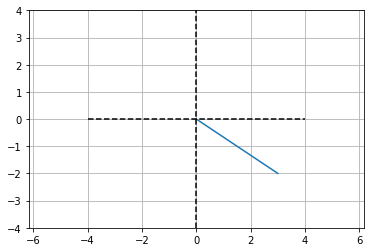

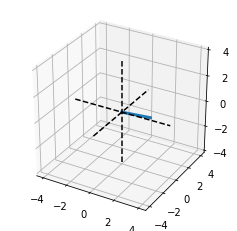

In [ ]:

# 2-dimensional vector
v2 = [ 3, -2 ]

# 3-dimensional vector
v3 = [ 4, -3, 2 ]
# row to column (or vice-versa):
v3t = np.transpose(v3)


# plot them
plt.plot([0,v2[0]],[0,v2[1]])
plt.axis('equal')
plt.plot([-4, 4],[0, 0],'k--')
plt.plot([0, 0],[-4, 4],'k--')
plt.grid()
plt.axis((-4, 4, -4, 4))
plt.show()


# plot the 3D vector
fig = plt.figure(figsize=plt.figaspect(1))
ax = plt.axes(None, projection='3d')
ax.plot([0, v3[0]],[0, v3[1]],[0, v3[2]],linewidth=3)

# make the plot look nicer
ax.plot([0, 0],[0, 0],[-4, 4],'k--')
ax.plot([0, 0],[-4, 4],[0, 0],'k--')
ax.plot([-4, 4],[0, 0],[0, 0],'k--')
plt.show()


---
# Vector addition/subtraction
---


[5 3]


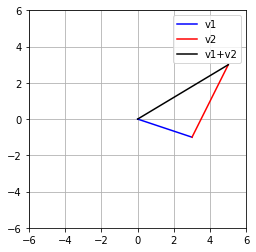

In [ ]:

# two vectors in R2
v1 = np.array([ 3, -1 ])
v2 = np.array([ 2,  4 ])

v3 = v1 + v2
print(v3)

# plot them
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v1')
plt.plot([0, v2[0]]+v1[0],[0, v2[1]]+v1[1],'r',label='v2')
plt.plot([0, v3[0]],[0, v3[1]],'k',label='v1+v2')

plt.legend()
plt.axis('square')
plt.axis((-6, 6, -6, 6 ))
plt.grid()
plt.show()



---
# Vector-scalar multiplication
---


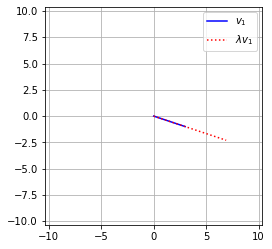

In [ ]:
# vector and scalar
v1 = np.array([ 3, -1 ])
l  = 2.3
v1m = v1*l # scalar-modulated

# plot them
plt.plot([0, v1[0]],[0, v1[1]],'b',label='$v_1$')
plt.plot([0, v1m[0]],[0, v1m[1]],'r:',label='$\lambda v_1$')

plt.legend()
plt.axis('square')
axlim = max([max(abs(v1)),max(abs(v1m))])*1.5 # dynamic axis lim
plt.axis((-axlim,axlim,-axlim,axlim))
plt.grid()
plt.show()


---
# Vector-vector multiplication: the dot product
---


In [ ]:
## many ways to compute the dot product

v1 = np.array([ 1, 2, 3, 4, 5])
v2 = np.array([ 0,-4,-3, 6, 5 ])

# method 1
dp1 = sum( np.multiply(v1,v2) )

# method 2
dp2 = np.dot( v1,v2 )

# method 3
dp3 = np.matmul( v1,v2 )

# method 4
dp4 = 0  # initialize

# loop over elements
for i in range(len(v1)):

    # multiply corresponding element and sum
    dp4 = dp4 + v1[i]*v2[i]


print(dp1,dp2,dp3,dp4)

32 32 32 32


# Dot product properties: associative and distributive

In [ ]:
## Distributive property

# create random vectors
n = 10
a = np.random.randn(n)
b = np.random.randn(n)
c = np.random.randn(n)

# the two results
res1 = np.dot( a , (b+c) )
res2 = np.dot(a,b) + np.dot(a,c)

# compare them
print([ res1,res2 ])

[-2.079822464194626, -2.0798224641946255]


In [ ]:
## Associative property

# create random vectors
n = 5
a = np.random.randn(n)
b = np.random.randn(n)
c = np.random.randn(n)

# the two results
res1 = np.dot( a , np.dot(b,c) )
res2 = np.dot( np.dot(a,b) , c )

# compare them
print(res1)
print(res2)


### special cases where associative property works!
# 1) one vector is the zeros vector
# 2) a==b==c


[ 0.58152749  0.40419161 -0.01772299 -1.04141307  0.22180684]
[-0.69060257  0.71119289 -0.73786292 -0.78977644 -1.88403182]



---
# Vector length
---


In [ ]:
# a vector
v1 = np.array([ 1, 2, 3, 4, 5, 6 ])

# methods 1-4, just like with the regular dot product, e.g.:
vl1 = np.sqrt( sum( np.multiply(v1,v1)) )

# method 5: take the norm
vl2 = np.linalg.norm(v1)

print(vl1,vl2)

9.539392014169456 9.539392014169456



---
# VIDEO: Vector Hadamard multiplication
---


In [ ]:

# create vectors
w1 = [ 1, 3, 5 ]
w2 = [ 3, 4, 2 ]

w3 = np.multiply(w1,w2)
print(w3)


[ 3 12 10]



---
# Vector outer product
---


In [ ]:

v1 = np.array([  1, 2, 3 ])
v2 = np.array([ -1, 0, 1 ])

# outer product
np.outer(v1,v2)

# terrible programming, but helps conceptually:
op = np.zeros((len(v1),len(v2)))
for i in range(0,len(v1)):
    for j in range(0,len(v2)):
        op[i,j] = v1[i] * v2[j]

print(op)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-3.  0.  3.]]


##    SECTION: Introduction to matrices

In [ ]:
import numpy as np

In [ ]:

# square vs. rectangular
S = np.random.randn(5,5)  # 5 rows, 5 columns
R = np.random.randn(5,2) # 5 rows, 2 columns
print(S), print(' ')
print(R)

# identity
I = np.eye(3)
print(I), print(' ')

# zeros
Z = np.zeros((4,4))
print(Z), print(' ')

# diagonal
D = np.diag([ 1, 2, 3, 5, 2 ])
print(D), print(' ')

# create triangular matrix from full matrices
S = np.random.randn(5,5)
U = np.triu(S)
L = np.tril(S)
print(L), print(' ')

# concatenate matrices (sizes must match!)
A = np.random.randn(3,2)
B = np.random.randn(4,4)
C = np.concatenate((A,B),axis=1)
print(C)


---
# Matrix addition and subtraction
---


In [ ]:

# create random matrices
A = np.random.randn(5,4)
B = np.random.randn(5,4)
C = np.random.randn(5,4)

# try to add them
A+B
A+C



# "shifting" a matrix
l = .03 # lambda
N = 5  # size of square matrix
D = np.random.randn(N,N) # can only shift a square matrix

Ds = D + l*np.eye(N)
print(D), print(''), print(Ds)

[[ 0.29394619 -1.14304532 -0.35445409 -1.61175403 -3.38486715]
 [ 1.73065607  0.02819972  0.19154374 -0.39045383 -1.11896951]
 [-0.61966144 -0.88809151 -1.24917025 -1.22902609  2.35794406]
 [-0.42415112  0.17639158  0.96745295  0.70901642 -1.08771695]
 [-0.08736474  1.08183828  0.91310964 -0.12350607  0.34008438]]

[[ 0.32394619 -1.14304532 -0.35445409 -1.61175403 -3.38486715]
 [ 1.73065607  0.05819972  0.19154374 -0.39045383 -1.11896951]
 [-0.61966144 -0.88809151 -1.21917025 -1.22902609  2.35794406]
 [-0.42415112  0.17639158  0.96745295  0.73901642 -1.08771695]
 [-0.08736474  1.08183828  0.91310964 -0.12350607  0.37008438]]


(None, None, None)


---
# Matrix-scalar multiplication
---


In [ ]:
# define matrix and scalar
M = np.array([ [1, 2], [2, 5] ])
s = 2

# pre- and post-multiplication is the same:
print( M*s )
print()
print( s*M )


[[ 2  4]
 [ 4 10]]

[[ 2  4]
 [ 4 10]]


# Transpose

In [ ]:
M = np.array([ [1,2,3],
               [2,3,4] ])

print(M), print('')
print(M.T), print('') # one transpose
print(M.T.T), print('') # double-transpose returns the original matrix

# can also use the function transpose
print(np.transpose(M))

[[1 2 3]
 [2 3 4]]

[[1 2]
 [2 3]
 [3 4]]

[[1 2 3]
 [2 3 4]]

[[1 2]
 [2 3]
 [3 4]]



---
# Diagonal and trace
---


In [ ]:

M = np.round( 6*np.random.randn(4,4) )
print(M), print(' ')
# extract the diagonals
d = np.diag(M)

# notice the two ways of using the diag function
d = np.diag(M) # input is matrix, output is vector
D = np.diag(d) # input is vector, output is matrix
print(d)
print()
print(D)
print()
# trace as sum of diagonal elements
tr = np.trace(M)
tr2 = sum( np.diag(M) )
print(tr,tr2)

[[ 4. -8.  8. -7.]
 [-9.  3. -4.  1.]
 [ 4.  6.  4. -2.]
 [ 7.  8. -7. 12.]]
 
[ 4.  3.  4. 12.]

[[ 4.  0.  0.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  0.  4.  0.]
 [ 0.  0.  0. 12.]]

23.0 23.0


##    SECTION: Matrix multiplications

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math


---
# Standard matrix multiplication, parts 1 & 2
---


In [ ]:
## rules for multiplication validity

m = 4
n = 3
k = 6

# make some matrices
A = np.random.randn(m,n)
B = np.random.randn(n,k)
C = np.random.randn(m,k)

# test which multiplications are valid.
# Think of your answer first, then test.
np.matmul(A,B)
np.matmul(A,A)
np.matmul(A.T,C)
np.matmul(B,B.T)
np.matmul(np.matrix.transpose(B),B)
np.matmul(B,C)
np.matmul(C,B)
np.matmul(C.T,B)
np.matmul(C,B.T)


---
# Order-of-operations on matrices
---


In [ ]:

n = 7
L = np.random.randn(n,n)
I = np.random.randn(n,n)
V = np.random.randn(n,n)
E = np.random.randn(n,n)

# result of "forward" multiplication and then transpose
res1 = np.matrix.transpose( L @ I @ V @ E )

# result of "flipped" multiplication of transposed matrices
res2 = E.T @ V.T @ I.T @ L.T

# test equality by subtracting (ignore possible computer rounding errors)
res1-res2

array([[ 8.88178420e-16, -6.66133815e-16,  8.88178420e-16,
        -2.44249065e-15, -3.55271368e-15,  0.00000000e+00,
         8.88178420e-16],
       [-2.66453526e-15,  3.55271368e-15,  4.44089210e-15,
         3.55271368e-15,  0.00000000e+00,  0.00000000e+00,
         7.10542736e-15],
       [-7.10542736e-15, -3.55271368e-15, -1.77635684e-15,
        -7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
         3.55271368e-15],
       [-8.88178420e-16, -8.88178420e-16, -6.66133815e-16,
         3.55271368e-15,  0.00000000e+00,  1.77635684e-15,
         1.72084569e-15],
       [ 0.00000000e+00,  4.88498131e-15,  2.66453526e-15,
         1.06581410e-14,  3.55271368e-15,  7.10542736e-15,
        -8.88178420e-16],
       [ 1.77635684e-15, -7.10542736e-15, -7.10542736e-15,
        -3.55271368e-15, -8.88178420e-16, -7.10542736e-15,
        -5.32907052e-15],
       [ 0.00000000e+00, -7.10542736e-15,  7.10542736e-15,
        -1.06581410e-14, -1.06581410e-14,  0.00000000e+00,
         1.0658141


---
# Matrix-vector multiplication
---


In [ ]:

# number of elements
m = 4

# create matrices
N = np.random.randint(-10,11,(m,m))
S = np.round( N.T*N / m**2 ) # scaled symmetric

# and vector
w = np.array([-1, 0, 1, 2])

# with symmetric matrix
print( S@w )     # 1
print( S.T@w )   # 2
print( w@S )     # 3
print( w.T@S.T ) # 4
print( w.T@S )   # 5


# with nonsymmetric matrix
print( N@w )     # 1
print( N.T@w )   # 2
print( w@N )     # 3
print( w.T@N.T ) # 4
print( w.T@N )   # 5


[-2.  5.  8. 10.]
[-2.  5.  8. 10.]
[-2.  5.  8. 10.]
[-2.  5.  8. 10.]
[-2.  5.  8. 10.]
[ 12   2  -7 -31]
[ 16  24 -17 -24]
[ 16  24 -17 -24]
[ 12   2  -7 -31]
[ 16  24 -17 -24]



---
# 2D transformation matrices
---


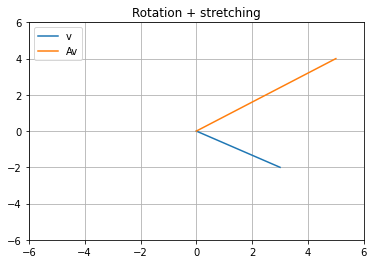

In [ ]:
# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 transformation matrix
A = np.array([ [1,-1], [2,1] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-6, 6, -6, 6))
plt.legend()
plt.title('Rotation + stretching')
plt.show()

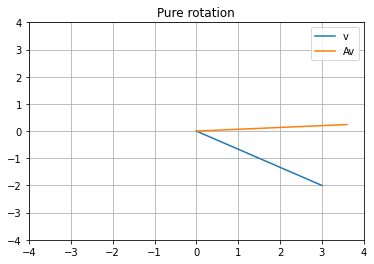

In [ ]:
## pure rotation

# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 rotation matrix
th = 5*np.pi/24
A = np.array([ [math.cos(th),-math.sin(th)], [math.sin(th),math.cos(th)] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-4, 4, -4, 4))
plt.legend()
plt.title('Pure rotation')
plt.show()


---
# Additive and multiplicative matrix identities
---


In [ ]:
# size of matrices
n = 4

# create the matrices
A = np.round( 10*np.random.randn(n,n) )
I = np.eye(n)
Z = np.zeros((n,n))

# test both identities
np.array_equal( A@I , A   )
np.array_equal( A   , A@I )
np.array_equal( A   , A+I )

np.array_equal( A   , A+I )
np.array_equal( A+Z , A@I )


True


---
# Element-wise (Hadamard) multiplication
---


In [ ]:
# any matrix sizes
m = 13
n =  2

# ...but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# note the different syntax compared to @ for matrix multiplication
C1 = np.multiply( A,B )
C2 = A*B

print(C1), print(' ')
print(C2), print(' ')

print(C1-C2)


[[ 3.17222577e-01 -3.83905037e-01]
 [-1.69874624e+00  9.70514670e-02]
 [-7.10459301e-01 -6.23389390e-01]
 [-1.47395651e+00  1.67236928e+00]
 [-3.42586480e-02 -4.90944573e-02]
 [-8.51837913e-02 -1.65477618e+00]
 [ 9.12219039e-01  1.09747339e+00]
 [ 1.58084796e-01  3.42934500e-01]
 [-2.94876588e-02 -9.97240576e-01]
 [-2.63526895e-01  6.16112879e-01]
 [-4.94046837e+00  4.89265709e-01]
 [-1.94985092e-01 -2.02405946e-02]
 [ 1.79662016e-03  2.97128075e-01]]
 
[[ 3.17222577e-01 -3.83905037e-01]
 [-1.69874624e+00  9.70514670e-02]
 [-7.10459301e-01 -6.23389390e-01]
 [-1.47395651e+00  1.67236928e+00]
 [-3.42586480e-02 -4.90944573e-02]
 [-8.51837913e-02 -1.65477618e+00]
 [ 9.12219039e-01  1.09747339e+00]
 [ 1.58084796e-01  3.42934500e-01]
 [-2.94876588e-02 -9.97240576e-01]
 [-2.63526895e-01  6.16112879e-01]
 [-4.94046837e+00  4.89265709e-01]
 [-1.94985092e-01 -2.02405946e-02]
 [ 1.79662016e-03  2.97128075e-01]]
 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0

##    SECTION: Matrix rank(dimensionality of information)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# make a matrix
m = 4
n=4
# create a random matrix
A = np.random.randn(m,n)
print(A)
# what is the largest possible rank?
ra = np.linalg.matrix_rank(A)
print('rank = ' + str(ra))
B=A
# set last column to be repeat of penultimate column
B[-1,:] = B[-2,:]
print(B)
rb = np.linalg.matrix_rank(B)
print('rank = ' + str(rb))

[[-0.06467261 -1.58932902 -1.48399093  0.75064348]
 [-0.02914118  0.71998477  0.8844313  -2.30461357]
 [-1.05649072  1.69047847 -0.73650074 -2.34674117]
 [ 0.60856782 -1.18958176  1.73223186 -1.91181829]]
rank = 4
[[-0.06467261 -1.58932902 -1.48399093  0.75064348]
 [-0.02914118  0.71998477  0.8844313  -2.30461357]
 [-1.05649072  1.69047847 -0.73650074 -2.34674117]
 [-1.05649072  1.69047847 -0.73650074 -2.34674117]]
rank = 3


In [ ]:
## adding noise to a rank-deficient matrix

# square for convenience
A = np.round( 10*np.random.randn(m,m) )

# reduce the rank
A[:,-1] = A[:,-2]

# noise level
noiseamp = .001

# add the noise
B = A + noiseamp*np.random.randn(m,m)

print('rank (w/o noise) = ' + str(np.linalg.matrix_rank(A)))
print('rank (with noise) = ' + str(np.linalg.matrix_rank(B)))


rank (w/o noise) = 3
rank (with noise) = 4


In [ ]:
# size of matrix
m = 30

# create the square symmetric matrix
A = np.random.randn(m,m)
A = np.round( 10*A.T@A )

# reduce the rank
A[:,0] = A[:,1]

# shift amount (l=lambda)
l = .01

# new matrix
B = A + l*np.eye(m,m)

# print information
print('rank(w/o shift) = %d' %np.linalg.matrix_rank(A))
print('rank(with shift) = %d' %np.linalg.matrix_rank(B))


rank(w/o shift) = 29
rank(with shift) = 30


##    SECTION: Solving systems of equations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
import time
from sympy import *


---
# Systems of equations: algebra and geometry
---


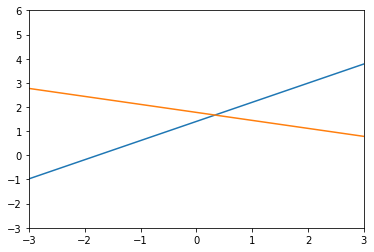

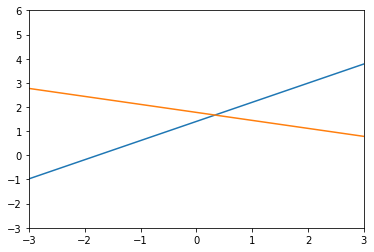

In [ ]:

# 3 these are the coefficients of the equation:
# ay = bx + c;
eq1o = [1., 2, 1] # [a b c]
eq2o = [2., 1, 3]


for i in range(10):

    # clear plot
    plt.cla()

    # randomly update equations
    eq1 = np.add(eq2o,np.random.randn(1)*eq1o)
    eq2 = np.add(eq1o,np.random.randn(1)*eq2o)

    # plot new lines (solutions)
    y = ([eq1[1]*-3, eq1[1]*3] + eq1[2])/eq1[0]
    plt.plot([-3,3],y)

    y = ([eq2[1]*-3, eq2[1]*3] + eq2[2])/eq2[0]
    plt.plot([-3,3],y)
    plt.axis([-3,3,-3,6])

    # pause to allow inspection
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(.1)


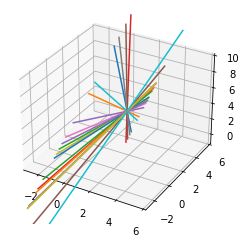

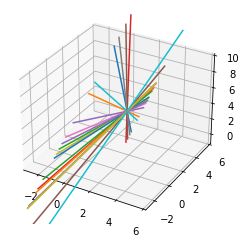

In [ ]:
# these are the coefficients of the equation:
# az = bx + cy + d
eq1o = [1, 2, 3, -1] # [a b c d]
eq2o = [2, 1, 3,  3]

# set up for 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')


for i in range(0,10):

#     plt.cla()

    # randomly update equations
    eq1 = np.add(eq2o,np.random.randn(1)*eq1o)
    eq2 = np.add(eq1o,np.random.randn(1)*eq2o)

    # plot new lines (solutions)
    y = ([eq1[1]*-3, eq1[1]*3] + eq1[3])/eq1[0]
    z = ([eq1[2]*-3, eq1[2]*3] + eq1[3])/eq1[0]
    ax.plot([-3,3],y,z)

    # plot new lines (solutions)
    y = ([eq2[1]*-3, eq2[1]*3] + eq2[3])/eq2[0]
    z = ([eq2[2]*-3, eq2[2]*3] + eq2[3])/eq2[0]
    ax.plot([-3,3],y,z)

    # axis limits
    ax.set_xlim3d(-3,6)
    ax.set_ylim3d(-3,6)
    ax.set_zlim3d(-1,10)

    # pause to allow inspection
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(.1)




---
# Reduced row echelon form
---


In [ ]:
# make some random matrices (using sympy package)
A = Matrix( np.random.randn(4,4) )
B = Matrix( np.random.randn(4,3) )

# compute RREF
rrefA = A.rref()
rrefB = B.rref()

# print out the matrix and its rref
print(np.array(rrefA[0]))
print(' ')
print(np.array(rrefB[0]))


[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
 
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]]


 ##    SECTION: Matrix inverse

In [ ]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

In [ ]:
# size of square matrix
m = 3

# generate random matrix
A = np.random.randn(m,m)

# compute its inverse
Ainv = np.linalg.inv(A)

# and check the multiplication
idm = A@Ainv

# print the matrix. Note the computer rounding errors on the off-diagonals
print(idm)

[[ 1.00000000e+00  1.20959206e-16 -2.94752433e-17]
 [ 3.23640748e-20  1.00000000e+00  6.16601943e-18]
 [ 8.49017437e-17  1.95963744e-17  1.00000000e+00]]


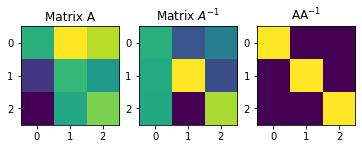

In [ ]:
# show in an image
plt.subplot(131)
plt.imshow(A)
plt.title('Matrix A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Matrix $A^{-1}$')

plt.subplot(133)
plt.imshow(idm)
plt.title('AA$^{-1}$')

plt.show()


---
# Computing the inverse via row reduction
---


In [ ]:

# matrix size
m = 4

# random integers matrix
A = Matrix( np.round(10*np.random.randn(m,m)),dtype='float' )

# augment A and identity
Aaug = Matrix( np.concatenate((A,np.eye(m,m)),axis=1) )
print('Size of Aaug:',Aaug.shape)

# rref
Asol = Aaug.rref()
Asol = Asol[0]
Ainvrref = Asol[:,m:m*2]
Ainv = A.inv()

Size of Aaug: (4, 8)


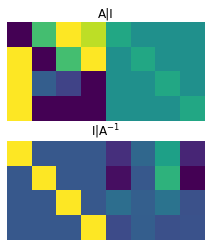

In [ ]:
# show the augemented matrices
plt.subplot(211)
plt.imshow(matrix2numpy(Aaug,dtype='float'),vmin=-5,vmax=5)
plt.title('A|I'), plt.axis('off')

plt.subplot(212)
plt.imshow(matrix2numpy(Asol,dtype='float'))
plt.title('I|A$^{-1}$'), plt.axis('off')

plt.show()

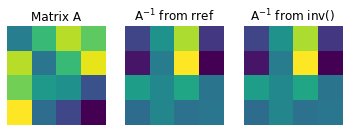

In [ ]:
# show the square matrices
plt.subplot(131)
plt.imshow(matrix2numpy(A,dtype='float'))
plt.title('Matrix A'), plt.axis('off')

plt.subplot(132)
plt.imshow(matrix2numpy(Ainvrref,dtype='float'))
plt.title('A$^{-1}$ from rref'), plt.axis('off')

plt.subplot(133)
plt.imshow(matrix2numpy(Ainv,dtype='float'))
plt.title('A$^{-1}$ from inv()'), plt.axis('off')

plt.show()

 ##    SECTION: Eigendecomposition

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from mpl_toolkits.mplot3d import Axes3D


---
# Finding eigenvalues
---


[-1.31662479  5.31662479]


C:\Users\Tusar\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


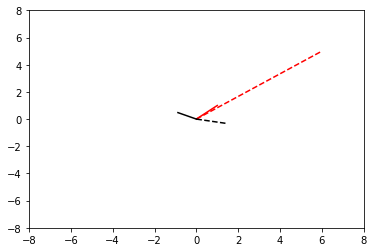

In [ ]:
# matrix
A = [ [1,5], [2,3] ]

# extract the eigenvalues
eigvals = np.linalg.eig(A)

# note that the eigenvalues are in the first element of eigvals:
print(eigvals[0])


# specify two vectors
v1 = np.array([ 1,1 ])    # is an eigenvector!
v2 = np.random.randn(2,1) # unlikely to be an eigenvector
v2 = v2/np.linalg.norm(v2)# unit length for convenience

# compute Av
Av1 = A@v1
Av2 = A@v2


# plot the vectors and Av
plt.plot([0,v1[0]] ,[0,v1[1]],'r')
plt.plot([0,Av1[0]],[0,Av1[1]],'r--')
plt.plot([0,v2[0]] ,[0,v2[1]],'k')
plt.plot([0,Av2[0]],[0,Av2[1]],'k--')

plt.axis([-8,8,-8,8])
plt.show()


In [ ]:
# confirm eigenvalues for a 3x3 matrix

# specify matrix
A = [ [-2,  2, -3 ],
      [-4,  1, -6 ],
      [-1, -2,  0 ]  ]

# get eigenvalues
evals = np.linalg.eig(A)
print(evals[0])


[-3. -1.  3.]



---
# Finding eigenvectors
---


In [ ]:
# matrix
A = [ [1,2], [2,1] ]

# eigenvectors (compare with code above)
# note also the differences with MATLAB: different order, evals in vector
evals,evecs = np.linalg.eig(A)
print(evals), print(' ')
print(evecs)

[ 3. -1.]
 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


0.9999999999999999 0.9999999999999999


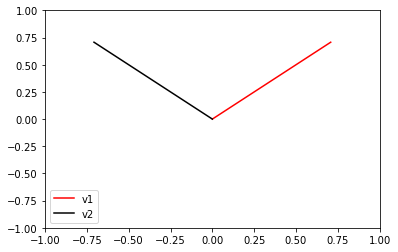

In [ ]:
# compute the norm of each eigenvector
mag_v1 = np.sqrt( np.sum( np.square(evecs[:,0])) )
mag_v2 = np.sqrt( np.sum( np.square(evecs[:,1])) )
print(mag_v1,mag_v2)

# plot
plt.plot([0,evecs[0,0]],[0,evecs[1,0]],'r',label='v1')
plt.plot([0,evecs[0,1]],[0,evecs[1,1]],'k',label='v2')


plt.axis([-1,1,-1,1])
plt.legend()
plt.show()

# Assignment

## Q1.

![1.JPG](attachment:1.JPG)

---
---

## Q2.

![2.JPG](attachment:2.JPG)